Author: Tashay Green in collaboration with Jordan Vani and Francis Ko

This is an investigation into CitiBike usage data from April to June 2016. 

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import datetime as dt
import scipy.stats as stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Idea: 
The purchasing of 24-Hour Passes is much higher on weekends (Sat-Sun) than during the weekdays.

## Null Hypothesis:
H<sub>o</sub>: 24-Hour Passes are purchased in equal or lesser amounts on weekends (Sat-Sun) as on weekdays (Mon-Fri).

## Alternative Hypothesis: 
H<sub>a</sub>: More 24-Hour Passes are purchased on weekends (Sat-Sun) than weekdays (Mon-Fri).

## Confidence Level: p = 0.05

In [2]:
# Importing CitiBike April 2016 - June 2016 Rider and Membership Usage Data. 
df = pd.read_csv('CitiBikeUsageData.csv')
df.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Cumulative trips (since launch):,Miles traveled today (midnight to 11:59 pm),Miles traveled to date:,Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),7-Day Passes Purchased (midnight to 11:59 pm)
0,4/1/16,34448,26384204,67595,48286873,163963,1113,0,82
1,4/2/16,21838,26406042,46206,48333079,164031,1193,0,63
2,4/3/16,15321,26421363,28615,48361694,164102,448,0,31
3,4/4/16,12302,26433665,20143,48381837,164167,49,0,19
4,4/5/16,26236,26459901,43723,48425560,164237,341,0,56


In [3]:
# Drop unwanted columns
df.drop(df.columns[[1,2,3,4,5,7,8]], axis =1, inplace = True)
df.head()

,Date,24-Hour Passes Purchased (midnight to 11:59 pm)
0,4/1/16,1113
1,4/2/16,1193
2,4/3/16,448
3,4/4/16,49
4,4/5/16,341


In [4]:
# Change Date format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,24-Hour Passes Purchased (midnight to 11:59 pm)
0,2016-04-01,1113
1,2016-04-02,1193
2,2016-04-03,448
3,2016-04-04,49
4,2016-04-05,341


In [5]:
# Populate Days that correspond to Date
df1 = df.copy()
df1['Days'] = df[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)
df1.head()

,Date,24-Hour Passes Purchased (midnight to 11:59 pm),Days
0,2016-04-01,1113,Friday
1,2016-04-02,1193,Saturday
2,2016-04-03,448,Sunday
3,2016-04-04,49,Monday
4,2016-04-05,341,Tuesday


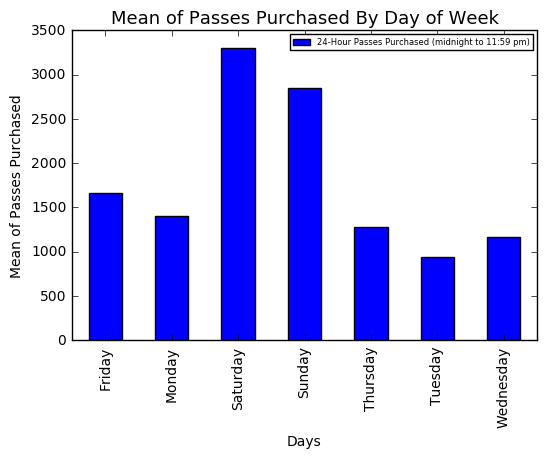

In [6]:
# Group data by Days, calculate mean and plot
df1.groupby(['Days'])['24-Hour Passes Purchased (midnight to 11:59 pm)'].mean().plot(kind='bar')
pl.title('Mean of Passes Purchased By Day of Week', fontsize=13)
pl.ylabel('Mean of Passes Purchased')
pl.xlabel('Days')
pl.legend(loc = 'upper right', fontsize = 6)

#### Figure 1: Mean of 24-Hour Passes Purchased By Day of Week

In [7]:
# Segment data by weekday and weekend
weekend = df1.query('Days == ["Saturday", "Sunday"]')['24-Hour Passes Purchased (midnight to 11:59 pm)']
weekday = df1.query('Days == ["Monday","Tuesday","Wednesday","Thursday","Friday"]')['24-Hour Passes Purchased (midnight to 11:59 pm)']
weekend.head()

1     1193
2      448
8      346
9     1508
15    3726
Name: 24-Hour Passes Purchased (midnight to 11:59 pm), dtype: int64

In [8]:
weekend.describe()

count      26.000000
mean     3072.153846
std      1595.688408
min       260.000000
25%      1942.250000
50%      3383.500000
75%      4058.250000
max      6432.000000
Name: 24-Hour Passes Purchased (midnight to 11:59 pm), dtype: float64

In [9]:
weekday.describe()

count      65.000000
mean     1287.923077
std       672.609455
min        49.000000
25%       927.000000
50%      1331.000000
75%      1549.000000
max      4230.000000
Name: 24-Hour Passes Purchased (midnight to 11:59 pm), dtype: float64

### Perform T-test on Data

In [10]:
stats.ttest_ind(weekend, weekday, axis=0, equal_var=False)

Ttest_indResult(statistic=5.5090988756907748, pvalue=6.4350141869036306e-06)

### After performing the t-test and learning that the p-value is smaller than the significance value of 0.05 we can REJECT the Null Hypothesis. 

There are more 24-Hour Passes purchased on the weekends Saturday - Sunday than during the weekdays. 